## Driver Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Importing dataset

In [2]:
driver_data = pd.read_csv("driver_data.csv")

In [3]:
driver_data.head()

,Distance_Feature,Speeding_Feature
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


<b>Feature Descriptions - </b><br>
<ul>
    <li><b>Distance feature:</b> mean distance driven per day</li>
    <li><b>Speeding feature:</b> mean percentage of time a driver was >5 mph over the speed limit</li>
</ul>

### Feature Scaling

Applying 'Feature Scaling' the data using Standard scaling

In [4]:
std_scale = StandardScaler().fit(driver_data)

In [5]:
driver_data_scaled = std_scale.transform(driver_data)

In [6]:
driver_data_scaled[:5,]

array([[-0.0898104 ,  1.26061251],
       [-0.43977285,  1.04174351],
       [-0.215131  ,  1.18765617],
       [-0.38066642,  0.8228745 ],
       [-0.40142849,  1.04174351]])

### KMeans Clustering

Running KMeans algorithm to find the optimal number of clusters using the elbow method

In [8]:
ssq = []

for k in range(1, 11):
    kmeans_model = KMeans(n_clusters = k, random_state = 123)
    kmeans_model.fit(driver_data_scaled)
    ssq.append(kmeans_model.inertia_)

Generating Scree plot to visualise the elbow curve

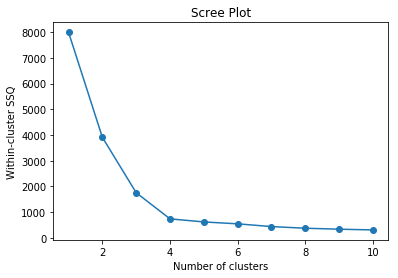

In [9]:
plt.plot(range(1,11), ssq, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster SSQ")
plt.title("Scree Plot")
plt.show()

<b>Inference</b><br>
Looking at the Scree plot we can observe that the curve becomes more or less linear after 4.<br>
Therefore, using this elbow curve we can conclude that 4 would be the optimal number for cluster.

Let's fit the KMeans model again with K=4

In [11]:
km = KMeans(n_clusters = 4, random_state = 123)

In [12]:
km.fit(driver_data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

Making predictions for the clusters of the given dataset.

In [13]:
predicted_clusters = km.predict(driver_data_scaled)

In [14]:
predicted_clusters[:5]

array([3, 3, 3, 3, 3], dtype=int32)

Plotting the clusters

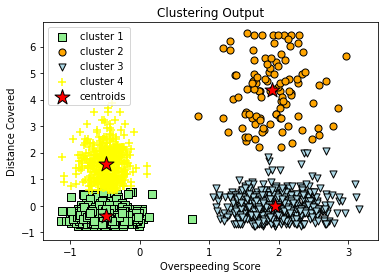

In [16]:
plt.scatter(driver_data_scaled[predicted_clusters==0,0], driver_data_scaled[predicted_clusters==0,1],\
            s=50, c='lightgreen', marker='s', edgecolors='black', label='cluster 1')

plt.scatter(driver_data_scaled[predicted_clusters==1,0], driver_data_scaled[predicted_clusters==1, 1],\
            s=50, c='orange',marker='o', edgecolors='black', label='cluster 2')

plt.scatter(driver_data_scaled[predicted_clusters==2,0], driver_data_scaled[predicted_clusters==2, 1],\
            s=50, c='lightblue',marker='v', edgecolors='black', label='cluster 3')

plt.scatter(driver_data_scaled[predicted_clusters==3,0], driver_data_scaled[predicted_clusters==3, 1],\
            s=50, c='yellow',marker='+', edgecolors='black', label='cluster 4')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, c='red',\
           marker='*', edgecolors='black', label='centroids')

plt.legend(scatterpoints=1)
plt.xlabel("Overspeeding Score")
plt.ylabel("Distance Covered")

plt.title("Clustering Output")
plt.show()

#### Inference

Cluster 1: These are drivers who haven't travelled a lot and haven't oversped as well.<br>
Cluster 4: These are drivers who have had fair amount of travelling but were within the speed limit as far as possible.<br>
Cluster 3: These are drivers who have oversped even though they were travelling short distances.<br>
Cluster 2: These drivers have done the most amount of driving but have also had the most number of overspeeding cases.

<u>We could label these groups as follows -<u>

Cluster 1: Slow pokes <br>
Cluster 4: Balancers <br>
Cluster 3: Sprinters <br>
Cluster 2: Road runners <br>  

<b>Calculating Silhouette Score for KMeans</b>

In [18]:
klabels = km.labels_

In [20]:
from sklearn import metrics
kmeans_score = metrics.silhouette_score(driver_data_scaled, klabels, metric='euclidean')

In [21]:
kmeans_score

0.7843727073779272

### Hierarchical Clustering

Creating Dendrogram for Driver Data

In [23]:
from scipy.cluster.hierarchy import linkage, dendrogram, set_link_color_palette

In [24]:
set_link_color_palette(['black'])

In [26]:
link = linkage(driver_data_scaled, method='ward', metric='euclidean')

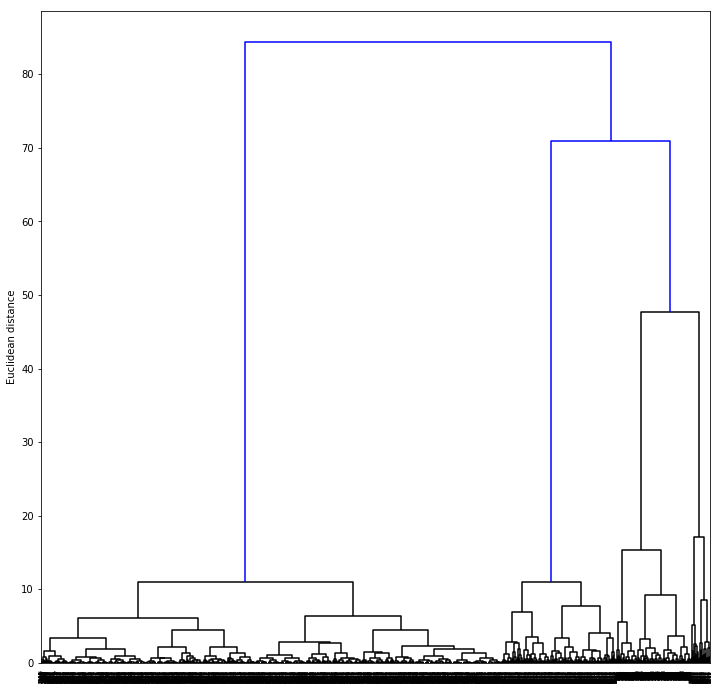

In [27]:
plt.figure(figsize=(12,12))
dnd = dendrogram(link)
plt.ylabel("Euclidean distance")
plt.show()

Going by the thumb rule, we cut the dendrogram where the gap between two successive combination similarities is largest.<br>
So going by the above figure, we can make this cut for <u>4 clusters</u>.

We verify this numerical choice by calculating the 'Silhouette Score'

Using Scikit-Learn to apply Agglomerative Clustering.

In [31]:
from sklearn.cluster import AgglomerativeClustering

In [32]:
h_model = AgglomerativeClustering(n_clusters=4)

In [33]:
h_model.fit(driver_data_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=4,
            pooling_func=<function mean at 0x103f987b8>)

In [34]:
h_model.labels_

array([1, 1, 1, ..., 2, 2, 2])

<b>Calculating Silhouette Score for KMeans</b>

In [39]:
hierarchical_score = metrics.silhouette_score(driver_data_scaled, h_model.labels_)

In [40]:
hierarchical_score

0.778897040913367

<b>Silhouette Score Comparison</b>
    <tr>
        <th>K Means Clustering</th>
        <th>Hierarchical Clustering</th>
    </tr>
    <tr>
        <td>0.7843727073779272</td>
        <td>0.778897040913367</td>
    </tr>

By comparing the aforementioned <i>Silhouette Scores</i>, we can determine that K-Means Clustering model is better for Driver Data analysis.